In [8]:
from PIL import Image
import numpy as np
import os
import cv2
from skimage import measure, io
from skimage.color import rgb2gray
from skimage.filters import threshold_otsu
import matplotlib.pyplot as plt
from scipy.spatial import Delaunay

In [61]:
directory = 'japan/'

for filename in os.listdir(directory):
    if filename.endswith(".jpg"):
        file_path = os.path.join(directory, filename)
    else:
        continue
    image = Image.open(file_path)
    gray_image = image.convert('L')

    bnw_image = gray_image.point(lambda x: 0 if x < 128 else 255, '1')

    bnw_image_matrix = np.array(bnw_image)

    bnw_image = Image.fromarray(bnw_image_matrix)
    bnw_image.save(directory+'bnw/'+filename)

In [17]:
image_path = 'ppp.png'
def draw_outline_one_line(image_path, output_path, threshold):
    # Read the image
    img = cv2.imread(image_path)

    # Convert the image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Apply a Canny edge detector to find edges
    edges = cv2.Canny(gray, 100, 200)

    # Define a kernel size based on the threshold
    kernel = np.ones((threshold, threshold), np.uint8)

    # Dilate the edges to merge close lines
    dilated_edges = cv2.dilate(edges, kernel, iterations=1)

    # Erode the edges back to single-pixel width
    merged_edges = cv2.erode(dilated_edges, kernel, iterations=1)

    # Create an output image with white background
    outline_image = np.ones_like(img) * 255

    # Draw the merged edges in black
    outline_image[merged_edges == 255] = [0, 0, 0]

    # Save the output image
    cv2.imwrite(output_path, outline_image)

    # Display the original and outline images
    plt.subplot(121), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), plt.title('Original Image')
    plt.subplot(122), plt.imshow(cv2.cvtColor(outline_image, cv2.COLOR_BGR2RGB)), plt.title('Single Line Outline Image')
    plt.show()

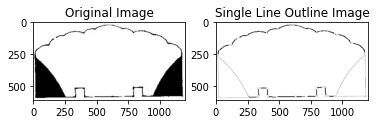

In [19]:
draw_outline_one_line(image_path, 'GG.png', 5)